# Case Study: Wine Quality Data Analysis 


# 1) Introduction 


In this case study, I will be covering a favourite topic of mine, alcohol. More specifically, wine. (Please excuse the "biasness" in the topic of this case study.)  


# 2) Data Set  


## 2.1) Description 

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine, from the north of Portugal. 

Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality?spm=a2c4e.11153940.blogcont603256.15.333b1d6fYOsiOK7). 

Reference:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.


## 2.2) Attribute Information 

Input variables (based on physicochemical tests):
1.  fixed acidity
2.  volatile acidity
3.  citric acid
4.  residual sugar
5.  chlorides
6.  free sulfur dioxide
7.  total sulfur dioxide
8.  density
9.  pH
10. sulphates
11. alcohol

Output variable (based on sensory data):
12. quality (score between 0 and 10)

For more information, read [Cortez et al., 2009]. 


# 3) Research Questions  

This case study aims to conduct an exploratory data analysis. Based on this dataset, this analysis aims to find out factors that correlate with wine quality. This analysis aims to uncover insights that may help consumers through a data-driven approach.  


# 4) Data Organisation 

Before we begin with the analysis, there is a need to organise the data. 

In [1]:
#importing the relevant libraries and datasets 

import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

red_wine = pd.read_csv('C:/Users/user/Documents/Data Analytics/Wine/winequality-red.csv')
white_wine = pd.read_csv('C:/Users/user/Documents/Data Analytics/Wine/winequality-white.csv') 

In [3]:
# Basic information
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [12]:
# No null values in both datasets 

# Descriptive Statistics

red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [13]:
# Checking for duplicates

red_wine.duplicated().sum() 

240

In [14]:
white_wine.duplicated().sum()

937

In [2]:
# Remove duplicates 

red_wine.drop_duplicates(inplace=True)

In [3]:
white_wine.drop_duplicates(inplace=True) 

In [25]:
# Checking for duplicates

red_wine.duplicated().sum() 

0

In [26]:
white_wine.duplicated().sum()

0

In [4]:
# Creating colour column 

red_wine['colour']= "red" 

red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,red
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [5]:
white_wine['colour'] = "white"

white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [6]:
# Combining both datasets 

wine_total = red_wine.append(white_wine) 

wine_total

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [35]:
# Renaming columns 

wine_total.columns = [c.replace(' ', '_') for c in wine_total.columns]

wine_total.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'colour'],
      dtype='object')

# 5) Data Analysis 

After preparing the data, analysis can commence. 


## 5.1) Correlations 

We can begin by looking at the correlations between the variables of this dataset.  

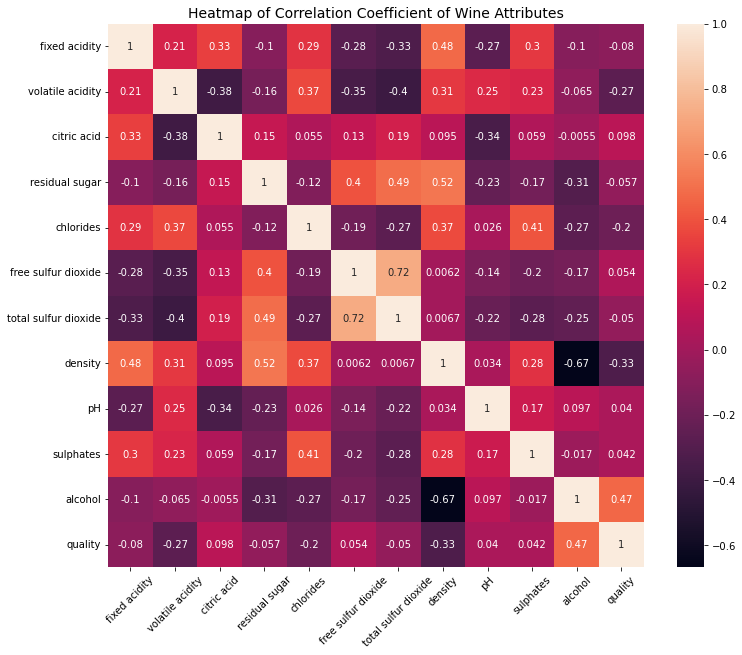

In [11]:
# Plotting heatmap for correlation Table 

# calculating the correlation matrix 
corr = wine_total.corr() 

# plotting the heatmap correlation matrix 
plt.figure(figsize=[12,10])
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot = True)
plt.xticks(rotation=45)
plt.title("Heatmap of Correlation Coefficient of Wine Attributes", size=14);

As shown in the bottom row of the correlation matrix, _alcohol_ has the most positive correlation with quality of 0.47. On the other hand, both _density_ and _volatile acidity_ have more negative correlations (-0.33 and -0.27 respectively) with quality. 

## 5.2) Quality 

We will now move forward with more targeted analysis towards quality along with other variables.  

We begin by looking at the distribution of quality scores. 

<AxesSubplot:>

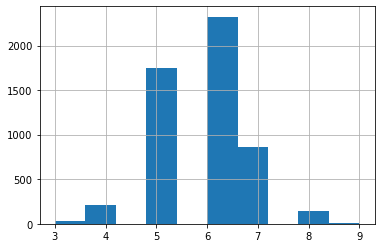

In [10]:
# Quality 

wine_total['quality'].hist()

Majority of the scores fall between 5-7 (on a scale from 0-10), with the highest number of ratings falling between approximately 6-6.5.  


### 5.2.1) Quality x Colour

It will be interesting to compare the average quality scores between the different colours.

In [11]:
# Quality x Colour 

wine_total.groupby('colour')['quality'].mean()

colour
red      5.623252
white    5.854835
Name: quality, dtype: float64

White wine has a slightly higher average quality score of 5.85 as compared to the average score of 5.62 for red wine. 

### 5.2.2) Quality x Alcohol 

As a consumer, a common thing to look out for when purchasing alcoholic drinks would naturally be the alcohol content. As such, is there a relationship between alcohol content and quality? (For instance, would drinks with a higher alcohol content receive better quality ratings?) 

Let's get a better picture of the distribution of alcohol content. 

<AxesSubplot:>

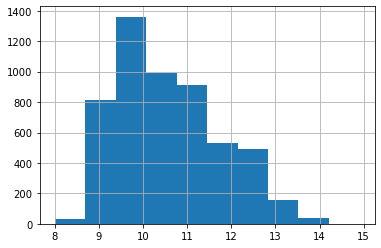

In [12]:
# Alcohol Content 

wine_total['alcohol'].hist()

The distribution of alcohol content seems slightly skewed to the left. 

Therefore, for the purpose of this analysis, the median would be used as the benchmark instead of the mean. 

In [13]:
# Median of alcohol content 

wine_total['alcohol'].median()

10.4

The wine samples would be split into two groups: wine samples with low alcohol content (alcohol less than 10.4) and wine samples with high alcohol content (alcohol more than or equal to 10.4). 

The mean quality score of each group would then be derived and compared. 

In [15]:
# Extracting samples with low alcohol content
low_alcohol_wine = wine_total.query('alcohol < 10.4')

# Extracting samples with high alcohol content 
high_alcohol_wine = wine_total.query('alcohol >= 10.4') 

# Ensuring that the number of samples from both groups add up 
wine_total['alcohol'].count() == low_alcohol_wine['alcohol'].count() + high_alcohol_wine['alcohol'].count() 

True

In [16]:
# Mean quality score of wine with low alcohol content 
low_alcohol_wine['quality'].mean()

5.439202148062908

In [17]:
# Mean quality score of wine with high alcohol content 
high_alcohol_wine['quality'].mean()

6.138223368964246

In [21]:
# Storing the respective mean quality values
low_alcohol_mean_quality = low_alcohol_wine['quality'].mean() 
high_alcohol_mean_quality = high_alcohol_wine['quality'].mean() 

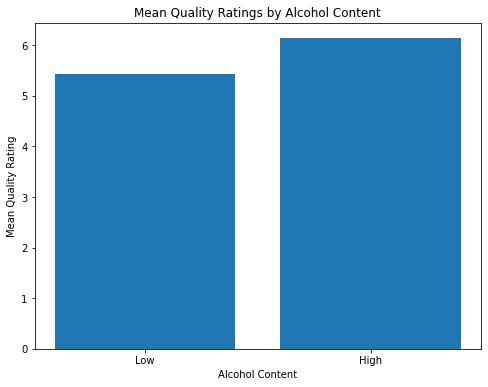

In [25]:
# Plotting bar chart of mean quality 
alcohol = ['Low', 'High']
heights = [low_alcohol_mean_quality, high_alcohol_mean_quality]

plt.figure(figsize=[8,6])
plt.bar(alcohol, heights)
plt.title('Mean Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Mean Quality Rating');

As shown above, wines with higher alcohol content (alcohol content >= 10.4) receive higher ratings than wines with lower alcohol content. 

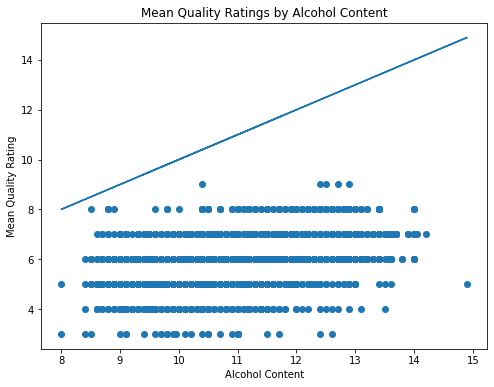

In [48]:
# Calculating gradient and intercept of regression line
m, b = np.polyfit(wine_total['alcohol'], wine_total['alcohol'], 1)

# Plotting scatter plot and linear regression line
plt.figure(figsize=[8,6])
plt.scatter(wine_total['alcohol'], wine_total['quality'])
plt.plot(wine_total['alcohol'], m*wine_total['alcohol'] + b)
plt.title('Mean Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Mean Quality Rating');

Furthermore, as shown above, there is a positive correlation of 0.47 between alcohol content and quality. This means that as the alcohol content in the wine increases, the quality ratings received would increase as well. 

### 5.2.3) Quality x Sweetness 

Another primary concern for consumers would be taste. Undoubtedly, the sweetness of the wine is a primary factor that influences taste. As such, is there a relationship between sweetness and quality ratings of the wine? (I.e. would sweeter wines receive higher ratings?) 

In this analysis, the level of residual sugar would be used to measure the sweetness of the wine. 

The form of analysis would be similar to that of quality and alcohol content. We begin by looking at the distribution of residual sugar. 

<AxesSubplot:>

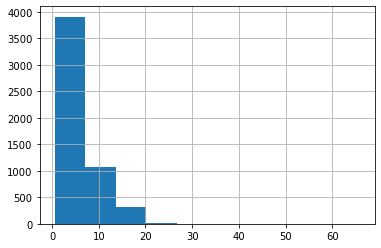

In [36]:
# Residual sugar

wine_total['residual_sugar'].hist()

The distribution of residual sugar seems skewed to the left. 

Therefore, for the purpose of this analysis, the median would be used as the benchmark instead of the mean. 

In [37]:
# Median of residual sugar

wine_total['residual_sugar'].median()

2.7

In [ ]:
The wine samples would be split into two groups: wine samples with low sugar (residual sugar less than 2.7) and wine samples with high sugar (residual sugar more than or equal to 2.7). 

The mean quality score of each group would then be derived and compared. 

In [38]:
# Extracting samples with low alcohol content
low_sugar_wine = wine_total.query('residual_sugar < 2.7')

# Extracting samples with high alcohol content 
high_sugar_wine = wine_total.query('residual_sugar >= 2.7') 

# Ensuring that the number of samples from both groups add up 
wine_total['residual_sugar'].count() == low_sugar_wine['residual_sugar'].count() + high_sugar_wine['residual_sugar'].count() 

True

In [39]:
# Mean quality score of wine with low residual sugar
low_sugar_wine['quality'].mean()

5.78316032295271

In [40]:
# Mean quality score of wine with high residual sugar
high_sugar_wine['quality'].mean()

5.807649871276205

Wines with a higher residual sugar content ( residual sugar >= 2.7) receive slightly higher quality ratings than wines with a lower residual sugar content. Given the small difference in mean quality scores, the difference might not be as evident with a bar chart. 

Instead, we would be plotting the relationship between residual sugar and quality using a scatter plot instead. 

In [41]:
# Storing the respective mean quality values
low_sugar_mean_quality = low_sugar_wine['quality'].mean() 
high_sugar_mean_quality = high_sugar_wine['quality'].mean() 

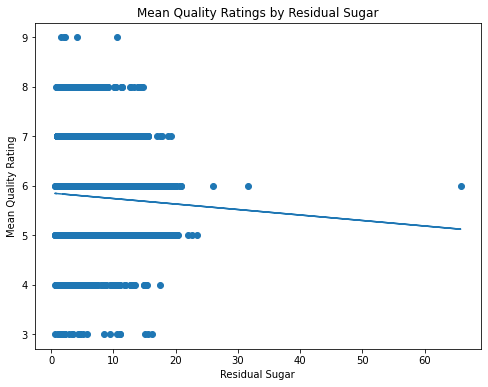

In [45]:
# Calculating gradient and intercept of regression line
m, b = np.polyfit(wine_total['residual_sugar'], wine_total['quality'], 1)

# Plotting scatter plot and linear regression line
plt.figure(figsize=[8,6])
plt.scatter(wine_total['residual_sugar'], wine_total['quality'])
plt.plot(wine_total['residual_sugar'], m*wine_total['residual_sugar'] + b)
plt.title('Mean Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Mean Quality Rating');

As shown from the correlation matrix above, there is a negative correlation of -0.057 between residual sugar and quality. This means that as residual sugar increases, quality decreases. However, given the small magnitude of this correlation, the relationship between these 2 variables is weak. Therefore, there is insufficient evidence to suggest that a relationship exists between residual sugar and quality. 

### 5.2.4) Quality x Acidity 

Another factor that affects the flavour of the wine is acidity. As shown by the variables in attribute information above, wine contains different acids. For this analysis, we would not be focusing on any specific acid. Instead, we would be using pH levels as a more general measure. 

Similarly, we begin by looking at the general distribution of pH in the dataset. 

<AxesSubplot:>

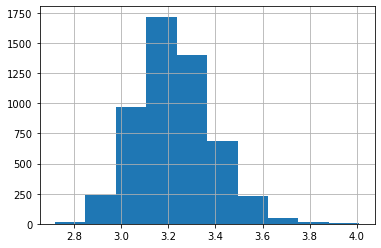

In [46]:
# pH distribution 

wine_total['pH'].hist()

In [47]:
# General statistics of pH
wine_total['pH'].describe()

count    5320.000000
mean        3.224664
std         0.160379
min         2.720000
25%         3.110000
50%         3.210000
75%         3.330000
max         4.010000
Name: pH, dtype: float64

The pH values of this dataset ranges from 2.72 to 4.01. The pH distribution is slightly skewed to the left as well. As such, for the purpose of this analysis, the median pH value will be used as the benchmark as well.  

In [49]:
# Median pH value
wine_total['pH'].median()

3.21

The wine samples would be split into two groups: wine samples with low pH (pH less than 3.21) and wine samples with high pH (pH more than or equal to 3.21). 

The mean quality score of each group would then be derived and compared. 

In [53]:
# Extracting samples with high acidity
high_acidity_wine = wine_total.query('pH < 3.21')

# Extracting samples with low acidity
low_acidity_wine = wine_total.query('pH >= 3.21') 

# Ensuring that the number of samples from both groups add up 
wine_total['pH'].count() == low_acidity_wine['pH'].count() + high_acidity_wine['pH'].count() 

True

In [54]:
# Mean quality score of wine with low acidity
low_acidity_wine['quality'].mean()

5.842257597684515

In [55]:
# Mean quality score of wine with high acidity
high_acidity_wine['quality'].mean()

5.745305164319249

Wines with a lower acidity ( pH >= 3.21) receive slightly higher quality ratings than wines with a higher acidity. Given the small difference in mean quality scores, the difference might not be as evident with a bar chart as well. 

Instead, we would be plotting the relationship between acidity and quality using a scatter plot instead. 

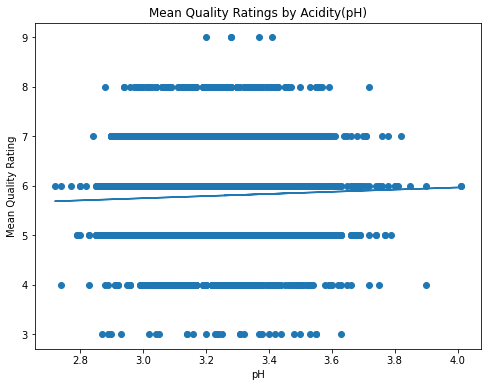

In [56]:
# Calculating gradient and intercept of regression line
m, b = np.polyfit(wine_total['pH'], wine_total['quality'], 1)

# Plotting scatter plot and linear regression line
plt.figure(figsize=[8,6])
plt.scatter(wine_total['pH'], wine_total['quality'])
plt.plot(wine_total['pH'], m*wine_total['pH'] + b)
plt.title('Mean Quality Ratings by Acidity(pH)')
plt.xlabel('pH')
plt.ylabel('Mean Quality Rating');

As shown by the correlation matrix above, there is a slight positive correlation of 0.04 between pH and quality. (Remember there is a negative correlation between pH and acidity: the lower the pH value, the more acidic the wine is) 

This suggests that as the acidity of the wine decreases (or as pH increases), the quality of wine increases. 

However, given the small magnitude of the correlation, the relationship between acidity and quality is weak. Therefore, there is insufficient evidence to suggest that a relationship exists between acidity and quality. 

# 6) Conclusion 

This case study analysed two datasets related to red and white variants of the Portuguese "Vinho Verde" wine, from the north of Portugal. The analysis aims to uncover insights that may help consumers using a data-driven approach, specifically investigating factors that correlate with wine quality through an exploratory data analysis. 


## 6.1) Main findings 

The main findings from this case study are as follows: 

1. White wine has a slightly higher average quality score of 5.85 as compared to the average score of 5.62 for red wine.

2. Wines with higher alcohol content (alcohol content >= 10.4) receive higher ratings than wines with lower alcohol content.

3. Alcohol content and quality share a positive correlation of 0.47. This means that as the alcohol content in the wine increases, the quality ratings received would increase as well.

Unfortunately, there is insufficient evidence to conclude any relationships between quality and both sweetness as well as acidity respectively. 


## 6.2) Caveates 

It is important to note that the insights derived from this analysis is only applicable to red and white variants of the Portuguese "Vinho Verde" wine. The insights are not applicable and/or representative towards other types of wine and/or other types of alcohol. 

Furthermore, the data available is insufficient. Other important attributes such as the year that the grapes were harvested, the weather conditions, the types of grapes used etc were not available in this dataset. Additional analysis should be conducted with these other important attributes to build on the robustness of the analysis and derived more accurate insights that may benefit consumers. 

## 6.3) Final remarks 

Taste is a very subjective matter. However, through the use of data analysis, manufacturers can get a better sense of the flavour profile of the massess and customise their products to fit them accordingly. This analysis hopes to give a sneak peak of the power and benefits of data analysis in consumer behaviour and preferences.  